In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm
from scipy.optimize import newton
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df_raw = pd.read_csv('TATASTEEL-CE.csv')

In [3]:
df_raw.head()

,Symbol,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover * in ₹ Lakhs,Premium Turnover ** in ₹ Lakhs,Open Int,Change in OI,Underlying Value
0,TATASTEEL,01-Dec-23,28-Dec-23,CE,100,28.6,28.6,28.6,28.60,28.6,30.5,1,7.07,1.57,66000,-,130.0
1,TATASTEEL,01-Dec-23,28-Dec-23,CE,101,-,-,-,28.35,-,29.5,-,-,-,-,-,130.0
2,TATASTEEL,01-Dec-23,28-Dec-23,CE,102,-,-,-,27.50,-,28.5,-,-,-,-,-,130.0
3,TATASTEEL,01-Dec-23,28-Dec-23,CE,103,-,-,-,26.60,-,27.5,-,-,-,-,-,130.0
4,TATASTEEL,01-Dec-23,28-Dec-23,CE,104,-,-,-,25.75,-,26.5,-,-,-,-,-,130.0


In [4]:
df_raw.tail()

,Symbol,Date,Expiry,Option type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover * in ₹ Lakhs,Premium Turnover ** in ₹ Lakhs,Open Int,Change in OI,Underlying Value
1031,TATASTEEL,27-Dec-23,28-Dec-23,CE,156,-,-,-,0.05,0.05,0.05,-,-,-,885500,-,137.2
1032,TATASTEEL,27-Dec-23,28-Dec-23,CE,157,0.05,0.05,0.05,0.05,0.05,0.05,12,103.65,0.03,979000,44000,137.2
1033,TATASTEEL,27-Dec-23,28-Dec-23,CE,97,-,-,-,32.00,-,40.20,-,-,-,-,-,137.2
1034,TATASTEEL,27-Dec-23,28-Dec-23,CE,98,-,-,-,31.05,-,39.20,-,-,-,-,-,137.2
1035,TATASTEEL,27-Dec-23,28-Dec-23,CE,99,-,-,-,30.15,-,38.20,-,-,-,-,-,137.2


In [5]:
df_raw.index

RangeIndex(start=0, stop=1036, step=1)

In [6]:
df_raw.columns

Index(['Symbol  ', 'Date  ', 'Expiry  ', 'Option type  ', 'Strike Price  ',
       'Open  ', 'High  ', 'Low  ', 'Close  ', 'LTP  ', 'Settle Price  ',
       'No. of contracts  ', 'Turnover * in  ₹ Lakhs',
       'Premium Turnover ** in   ₹ Lakhs', 'Open Int  ', 'Change in OI  ',
       'Underlying Value  '],
      dtype='object')

In [7]:
df_raw.replace(to_replace='-',value=0,inplace=True)

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Symbol                            1036 non-null   object 
 1   Date                              1036 non-null   object 
 2   Expiry                            1036 non-null   object 
 3   Option type                       1036 non-null   object 
 4   Strike Price                      1036 non-null   int64  
 5   Open                              1036 non-null   object 
 6   High                              1036 non-null   object 
 7   Low                               1036 non-null   object 
 8   Close                             1036 non-null   float64
 9   LTP                               1036 non-null   object 
 10  Settle Price                      1036 non-null   float64
 11  No. of contracts                  1036 non-null   object 
 12  Turnov

In [9]:
# The datatype of some columns are unworkable in their present form

convert_dict = {'LTP  ':float,'No. of contracts  ':float}

df = df_raw.astype(convert_dict)

In [10]:
df['Date  '] = pd.to_datetime(df['Date  '])
df['Expiry  ']= pd.to_datetime(df['Expiry  '])

C:\Users\amols\AppData\Local\Temp\ipykernel_5496\2874457226.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date  '] = pd.to_datetime(df['Date  '])


In [11]:
# Dropping unnecessary columns

df1 = df.drop(labels=['Open  ', 'High  ', 'Low  ','Turnover * in  ₹ Lakhs','Premium Turnover ** in   ₹ Lakhs', 'Open Int  ', 'Change in OI  '],axis=1)

In [12]:
df1.head()

,Symbol,Date,Expiry,Option type,Strike Price,Close,LTP,Settle Price,No. of contracts,Underlying Value
0,TATASTEEL,2023-12-01,2023-12-28,CE,100,28.60,28.6,30.5,1.0,130.0
1,TATASTEEL,2023-12-01,2023-12-28,CE,101,28.35,0.0,29.5,0.0,130.0
2,TATASTEEL,2023-12-01,2023-12-28,CE,102,27.50,0.0,28.5,0.0,130.0
3,TATASTEEL,2023-12-01,2023-12-28,CE,103,26.60,0.0,27.5,0.0,130.0
4,TATASTEEL,2023-12-01,2023-12-28,CE,104,25.75,0.0,26.5,0.0,130.0


In [13]:
# Dropping rows with no contracts

df2 = df1[df1['No. of contracts  ']>0]

In [14]:
df2

,Symbol,Date,Expiry,Option type,Strike Price,Close,LTP,Settle Price,No. of contracts,Underlying Value
0,TATASTEEL,2023-12-01,2023-12-28,CE,100,28.60,28.60,30.50,1.0,130.0
10,TATASTEEL,2023-12-01,2023-12-28,CE,110,18.70,18.70,20.60,3.0,130.0
15,TATASTEEL,2023-12-01,2023-12-28,CE,115,14.45,14.45,15.75,25.0,130.0
20,TATASTEEL,2023-12-01,2023-12-28,CE,120,11.15,11.10,11.15,141.0,130.0
22,TATASTEEL,2023-12-01,2023-12-28,CE,122,9.50,9.50,9.50,15.0,130.0
...,...,...,...,...,...,...,...,...,...,...
1027,TATASTEEL,2023-12-27,2023-12-28,CE,152,0.05,0.05,0.05,18.0,137.2
1028,TATASTEEL,2023-12-27,2023-12-28,CE,153,0.05,0.05,0.05,11.0,137.2
1029,TATASTEEL,2023-12-27,2023-12-28,CE,154,0.05,0.05,0.05,3.0,137.2
1030,TATASTEEL,2023-12-27,2023-12-28,CE,155,0.05,0.05,0.05,5.0,137.2


In [15]:
# Bifurcating data based on their moneyness

df_inmoney = df2[df2['Underlying Value  ']-df2['Strike Price  ']>0]

In [16]:
df_inmoney

,Symbol,Date,Expiry,Option type,Strike Price,Close,LTP,Settle Price,No. of contracts,Underlying Value
0,TATASTEEL,2023-12-01,2023-12-28,CE,100,28.60,28.60,30.50,1.0,130.0
10,TATASTEEL,2023-12-01,2023-12-28,CE,110,18.70,18.70,20.60,3.0,130.0
15,TATASTEEL,2023-12-01,2023-12-28,CE,115,14.45,14.45,15.75,25.0,130.0
20,TATASTEEL,2023-12-01,2023-12-28,CE,120,11.15,11.10,11.15,141.0,130.0
22,TATASTEEL,2023-12-01,2023-12-28,CE,122,9.50,9.50,9.50,15.0,130.0
...,...,...,...,...,...,...,...,...,...,...
1008,TATASTEEL,2023-12-27,2023-12-28,CE,133,4.15,4.10,4.15,352.0,137.2
1009,TATASTEEL,2023-12-27,2023-12-28,CE,134,3.30,3.20,3.30,377.0,137.2
1010,TATASTEEL,2023-12-27,2023-12-28,CE,135,2.20,2.10,2.20,3468.0,137.2
1011,TATASTEEL,2023-12-27,2023-12-28,CE,136,1.50,1.35,1.50,3043.0,137.2


In [17]:
df_inmoney = df_inmoney.reset_index(drop=True)

In [18]:
df_atmoney = df2[df2['Underlying Value  ']-df2['Strike Price  ']==0]
df_atmoney = df_atmoney.reset_index(drop=True)

In [19]:
df_outmoney = df2[df2['Underlying Value  ']-df2['Strike Price  ']<0]
df_outmoney = df_outmoney.reset_index(drop=True)

In [20]:
df_inmoney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Symbol              251 non-null    object        
 1   Date                251 non-null    datetime64[ns]
 2   Expiry              251 non-null    datetime64[ns]
 3   Option type         251 non-null    object        
 4   Strike Price        251 non-null    int64         
 5   Close               251 non-null    float64       
 6   LTP                 251 non-null    float64       
 7   Settle Price        251 non-null    float64       
 8   No. of contracts    251 non-null    float64       
 9   Underlying Value    251 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(2)
memory usage: 19.7+ KB


In [21]:
# There are 251 ITM call options

In [22]:
df_atmoney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Symbol              5 non-null      object        
 1   Date                5 non-null      datetime64[ns]
 2   Expiry              5 non-null      datetime64[ns]
 3   Option type         5 non-null      object        
 4   Strike Price        5 non-null      int64         
 5   Close               5 non-null      float64       
 6   LTP                 5 non-null      float64       
 7   Settle Price        5 non-null      float64       
 8   No. of contracts    5 non-null      float64       
 9   Underlying Value    5 non-null      float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(2)
memory usage: 532.0+ bytes


In [23]:
# There are 5 ATM calls

In [24]:
df_outmoney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Symbol              386 non-null    object        
 1   Date                386 non-null    datetime64[ns]
 2   Expiry              386 non-null    datetime64[ns]
 3   Option type         386 non-null    object        
 4   Strike Price        386 non-null    int64         
 5   Close               386 non-null    float64       
 6   LTP                 386 non-null    float64       
 7   Settle Price        386 non-null    float64       
 8   No. of contracts    386 non-null    float64       
 9   Underlying Value    386 non-null    float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(2)
memory usage: 30.3+ KB


In [25]:
# 386 OTM calls

In [26]:
# Code for Binomial Pricing Method

def binomial_crr(K,T,S0,r,N,sigma,opttype='C'):
    #precompute constants
    dt = T/N
    u = np.exp(sigma*np.sqrt(dt))
    d = 1/u
    q = (np.exp(r*dt) - d) / (u-d)
    disc = np.exp(-r*dt)

    # initialise asset prices at maturity - Time step N
    S = np.zeros(N+1)
    S[0] = S0*d**N
    for j in range(1,N+1):
        S[j] = S[j-1]*u/d

    # initialise option values at maturity
    C = np.zeros(N+1)
    for j in range(0,N+1):
        if opttype == 'C':
            C[j] = max(0, S[j]-K)
        else:
            C[j] = max(0, K - S[j])

    # step backwards through tree
    for i in np.arange(N,0,-1):
        for j in range(0,i):
            C[j] = disc * ( q*C[j+1] + (1-q)*C[j] )

    return round(C[0],2)

In [27]:
# Code for Black Scholes 

def blackScholes(r, S, K, T, sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    price = S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    return round(price,2)

In [28]:
df_inmoney['Maturity Time'] = (df_inmoney['Expiry  '] - df_inmoney['Date  ']).dt.days/365

In [29]:
df_inmoney

,Symbol,Date,Expiry,Option type,Strike Price,Close,LTP,Settle Price,No. of contracts,Underlying Value,Maturity Time
0,TATASTEEL,2023-12-01,2023-12-28,CE,100,28.60,28.60,30.50,1.0,130.0,0.073973
1,TATASTEEL,2023-12-01,2023-12-28,CE,110,18.70,18.70,20.60,3.0,130.0,0.073973
2,TATASTEEL,2023-12-01,2023-12-28,CE,115,14.45,14.45,15.75,25.0,130.0,0.073973
3,TATASTEEL,2023-12-01,2023-12-28,CE,120,11.15,11.10,11.15,141.0,130.0,0.073973
4,TATASTEEL,2023-12-01,2023-12-28,CE,122,9.50,9.50,9.50,15.0,130.0,0.073973
...,...,...,...,...,...,...,...,...,...,...,...
246,TATASTEEL,2023-12-27,2023-12-28,CE,133,4.15,4.10,4.15,352.0,137.2,0.002740
247,TATASTEEL,2023-12-27,2023-12-28,CE,134,3.30,3.20,3.30,377.0,137.2,0.002740
248,TATASTEEL,2023-12-27,2023-12-28,CE,135,2.20,2.10,2.20,3468.0,137.2,0.002740
249,TATASTEEL,2023-12-27,2023-12-28,CE,136,1.50,1.35,1.50,3043.0,137.2,0.002740


In [30]:
df_atmoney['Maturity Time'] = (df_atmoney['Expiry  '] - df_atmoney['Date  ']).dt.days/365

In [31]:
df_outmoney['Maturity Time'] = (df_outmoney['Expiry  '] - df_outmoney['Date  ']).dt.days/365

In [32]:
# Historical Volatility
hist_vol = 0.2689

# Risk Free Rate 
risk_free = 0.07

# Number of time steps in Binomial Method
time_steps = 2

In [33]:
df_inmoney['Binomial Price'] = np.vectorize(binomial_crr)(df_inmoney['Strike Price  '],df_inmoney['Maturity Time'],df_inmoney['Underlying Value  '],risk_free,time_steps,hist_vol,'C')

In [34]:
df_inmoney

,Symbol,Date,Expiry,Option type,Strike Price,Close,LTP,Settle Price,No. of contracts,Underlying Value,Maturity Time,Binomial Price
0,TATASTEEL,2023-12-01,2023-12-28,CE,100,28.60,28.60,30.50,1.0,130.0,0.073973,30.52
1,TATASTEEL,2023-12-01,2023-12-28,CE,110,18.70,18.70,20.60,3.0,130.0,0.073973,20.57
2,TATASTEEL,2023-12-01,2023-12-28,CE,115,14.45,14.45,15.75,25.0,130.0,0.073973,15.59
3,TATASTEEL,2023-12-01,2023-12-28,CE,120,11.15,11.10,11.15,141.0,130.0,0.073973,11.28
4,TATASTEEL,2023-12-01,2023-12-28,CE,122,9.50,9.50,9.50,15.0,130.0,0.073973,9.76
...,...,...,...,...,...,...,...,...,...,...,...,...
246,TATASTEEL,2023-12-27,2023-12-28,CE,133,4.15,4.10,4.15,352.0,137.2,0.002740,4.23
247,TATASTEEL,2023-12-27,2023-12-28,CE,134,3.30,3.20,3.30,377.0,137.2,0.002740,3.23
248,TATASTEEL,2023-12-27,2023-12-28,CE,135,2.20,2.10,2.20,3468.0,137.2,0.002740,2.35
249,TATASTEEL,2023-12-27,2023-12-28,CE,136,1.50,1.35,1.50,3043.0,137.2,0.002740,1.60


In [35]:
df_inmoney['BSM Price'] = np.vectorize(blackScholes)(risk_free,df_inmoney['Underlying Value  '],df_inmoney['Strike Price  '],df_inmoney['Maturity Time'],hist_vol)

In [36]:
df_inmoney

,Symbol,Date,Expiry,Option type,Strike Price,Close,LTP,Settle Price,No. of contracts,Underlying Value,Maturity Time,Binomial Price,BSM Price
0,TATASTEEL,2023-12-01,2023-12-28,CE,100,28.60,28.60,30.50,1.0,130.0,0.073973,30.52,30.52
1,TATASTEEL,2023-12-01,2023-12-28,CE,110,18.70,18.70,20.60,3.0,130.0,0.073973,20.57,20.60
2,TATASTEEL,2023-12-01,2023-12-28,CE,115,14.45,14.45,15.75,25.0,130.0,0.073973,15.59,15.74
3,TATASTEEL,2023-12-01,2023-12-28,CE,120,11.15,11.10,11.15,141.0,130.0,0.073973,11.28,11.17
4,TATASTEEL,2023-12-01,2023-12-28,CE,122,9.50,9.50,9.50,15.0,130.0,0.073973,9.76,9.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,TATASTEEL,2023-12-27,2023-12-28,CE,133,4.15,4.10,4.15,352.0,137.2,0.002740,4.23,4.23
247,TATASTEEL,2023-12-27,2023-12-28,CE,134,3.30,3.20,3.30,377.0,137.2,0.002740,3.23,3.26
248,TATASTEEL,2023-12-27,2023-12-28,CE,135,2.20,2.10,2.20,3468.0,137.2,0.002740,2.35,2.34
249,TATASTEEL,2023-12-27,2023-12-28,CE,136,1.50,1.35,1.50,3043.0,137.2,0.002740,1.60,1.53


In [37]:
df_atmoney['Binomial Price'] = np.vectorize(binomial_crr)(df_atmoney['Strike Price  '],df_atmoney['Maturity Time'],df_atmoney['Underlying Value  '],risk_free,time_steps,hist_vol,'C')

df_atmoney['BSM Price'] = np.vectorize(blackScholes)(risk_free,df_atmoney['Underlying Value  '],df_atmoney['Strike Price  '],df_atmoney['Maturity Time'],hist_vol)

In [38]:
df_atmoney

,Symbol,Date,Expiry,Option type,Strike Price,Close,LTP,Settle Price,No. of contracts,Underlying Value,Maturity Time,Binomial Price,BSM Price
0,TATASTEEL,2023-12-01,2023-12-28,CE,130,3.80,3.70,3.80,5787.0,130.0,0.073973,3.70,4.13
1,TATASTEEL,2023-12-04,2023-12-28,CE,131,3.60,3.60,3.60,1137.0,131.0,0.065753,3.49,3.90
2,TATASTEEL,2023-12-07,2023-12-28,CE,130,3.65,3.65,3.65,2324.0,130.0,0.057534,3.23,3.61
3,TATASTEEL,2023-12-14,2023-12-28,CE,132,3.45,3.45,3.45,4263.0,132.0,0.038356,2.63,2.95
4,TATASTEEL,2023-12-21,2023-12-28,CE,131,1.85,1.80,1.85,4632.0,131.0,0.019178,1.81,2.03


In [39]:
df_outmoney['Binomial Price'] = np.vectorize(binomial_crr)(df_outmoney['Strike Price  '],df_outmoney['Maturity Time'],df_outmoney['Underlying Value  '],risk_free,time_steps,hist_vol,'C')

df_outmoney['BSM Price'] = np.vectorize(blackScholes)(risk_free,df_outmoney['Underlying Value  '],df_outmoney['Strike Price  '],df_outmoney['Maturity Time'],hist_vol)

In [40]:
df_outmoney

,Symbol,Date,Expiry,Option type,Strike Price,Close,LTP,Settle Price,No. of contracts,Underlying Value,Maturity Time,Binomial Price,BSM Price
0,TATASTEEL,2023-12-01,2023-12-28,CE,131,3.35,3.20,3.35,1294.0,130.0,0.073973,3.44,3.64
1,TATASTEEL,2023-12-01,2023-12-28,CE,132,2.90,2.75,2.90,2046.0,130.0,0.073973,3.17,3.19
2,TATASTEEL,2023-12-01,2023-12-28,CE,133,2.50,2.40,2.50,1359.0,130.0,0.073973,2.91,2.78
3,TATASTEEL,2023-12-01,2023-12-28,CE,134,2.15,2.10,2.15,756.0,130.0,0.073973,2.65,2.41
4,TATASTEEL,2023-12-01,2023-12-28,CE,135,1.85,1.75,1.85,7612.0,130.0,0.073973,2.39,2.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,TATASTEEL,2023-12-27,2023-12-28,CE,152,0.05,0.05,0.05,18.0,137.2,0.002740,0.00,0.00
382,TATASTEEL,2023-12-27,2023-12-28,CE,153,0.05,0.05,0.05,11.0,137.2,0.002740,0.00,0.00
383,TATASTEEL,2023-12-27,2023-12-28,CE,154,0.05,0.05,0.05,3.0,137.2,0.002740,0.00,0.00
384,TATASTEEL,2023-12-27,2023-12-28,CE,155,0.05,0.05,0.05,5.0,137.2,0.002740,0.00,0.00


In [41]:
# Monte Carlo Simulation

# Adapted from an implementation provided by OpenAI's ChatGPT language model,
# Specifically tailored for pricing European Call options using the Monte Carlo method.


def monte_carlo_call(S, K, T, r, sigma, num_simulations):
    
    dt = T / 365  # Time step (assuming 365 days in a year)
    np.random.seed(42)  # for reproducibility
    stock_prices = np.zeros(num_simulations)
    
    for i in range(num_simulations):
        # Simulating stock price using geometric Brownian motion
        Z = np.random.normal(0, 1, 1)
        stock_price = S * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * Z)
        stock_prices[i] = stock_price
    
    # Calculate option payoff
    call_payoffs = np.maximum(stock_prices - K, 0)
    
    # Discounting the expected payoff to present value
    call_price = np.exp(-r * T) * np.mean(call_payoffs)
    
    return round(call_price,2)


In [42]:
# No. of simulations = 10000
sims = 10000

df_inmoney['MC Price'] = np.vectorize(monte_carlo_call)(df_inmoney['Underlying Value  '],df_inmoney['Strike Price  '],df_inmoney['Maturity Time'],risk_free,hist_vol,sims)

C:\Users\amols\AppData\Local\Temp\ipykernel_5496\114434464.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  stock_prices[i] = stock_price


In [43]:
df_inmoney

,Symbol,Date,Expiry,Option type,Strike Price,Close,LTP,Settle Price,No. of contracts,Underlying Value,Maturity Time,Binomial Price,BSM Price,MC Price
0,TATASTEEL,2023-12-01,2023-12-28,CE,100,28.60,28.60,30.50,1.0,130.0,0.073973,30.52,30.52,30.50
1,TATASTEEL,2023-12-01,2023-12-28,CE,110,18.70,18.70,20.60,3.0,130.0,0.073973,20.57,20.60,20.58
2,TATASTEEL,2023-12-01,2023-12-28,CE,115,14.45,14.45,15.75,25.0,130.0,0.073973,15.59,15.74,15.73
3,TATASTEEL,2023-12-01,2023-12-28,CE,120,11.15,11.10,11.15,141.0,130.0,0.073973,11.28,11.17,11.16
4,TATASTEEL,2023-12-01,2023-12-28,CE,122,9.50,9.50,9.50,15.0,130.0,0.073973,9.76,9.49,9.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,TATASTEEL,2023-12-27,2023-12-28,CE,133,4.15,4.10,4.15,352.0,137.2,0.002740,4.23,4.23,4.23
247,TATASTEEL,2023-12-27,2023-12-28,CE,134,3.30,3.20,3.30,377.0,137.2,0.002740,3.23,3.26,3.26
248,TATASTEEL,2023-12-27,2023-12-28,CE,135,2.20,2.10,2.20,3468.0,137.2,0.002740,2.35,2.34,2.34
249,TATASTEEL,2023-12-27,2023-12-28,CE,136,1.50,1.35,1.50,3043.0,137.2,0.002740,1.60,1.53,1.53


In [44]:
df_atmoney['MC Price'] = np.vectorize(monte_carlo_call)(df_atmoney['Underlying Value  '],df_atmoney['Strike Price  '],df_atmoney['Maturity Time'],risk_free,hist_vol,sims)

C:\Users\amols\AppData\Local\Temp\ipykernel_5496\114434464.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  stock_prices[i] = stock_price


In [45]:
df_atmoney

,Symbol,Date,Expiry,Option type,Strike Price,Close,LTP,Settle Price,No. of contracts,Underlying Value,Maturity Time,Binomial Price,BSM Price,MC Price
0,TATASTEEL,2023-12-01,2023-12-28,CE,130,3.80,3.70,3.80,5787.0,130.0,0.073973,3.70,4.13,4.13
1,TATASTEEL,2023-12-04,2023-12-28,CE,131,3.60,3.60,3.60,1137.0,131.0,0.065753,3.49,3.90,3.90
2,TATASTEEL,2023-12-07,2023-12-28,CE,130,3.65,3.65,3.65,2324.0,130.0,0.057534,3.23,3.61,3.60
3,TATASTEEL,2023-12-14,2023-12-28,CE,132,3.45,3.45,3.45,4263.0,132.0,0.038356,2.63,2.95,2.95
4,TATASTEEL,2023-12-21,2023-12-28,CE,131,1.85,1.80,1.85,4632.0,131.0,0.019178,1.81,2.03,2.03


In [46]:
df_outmoney['MC Price'] = np.vectorize(monte_carlo_call)(df_outmoney['Underlying Value  '],df_outmoney['Strike Price  '],df_outmoney['Maturity Time'],risk_free,hist_vol,sims)

C:\Users\amols\AppData\Local\Temp\ipykernel_5496\114434464.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  stock_prices[i] = stock_price


In [47]:
df_outmoney

,Symbol,Date,Expiry,Option type,Strike Price,Close,LTP,Settle Price,No. of contracts,Underlying Value,Maturity Time,Binomial Price,BSM Price,MC Price
0,TATASTEEL,2023-12-01,2023-12-28,CE,131,3.35,3.20,3.35,1294.0,130.0,0.073973,3.44,3.64,3.64
1,TATASTEEL,2023-12-01,2023-12-28,CE,132,2.90,2.75,2.90,2046.0,130.0,0.073973,3.17,3.19,3.19
2,TATASTEEL,2023-12-01,2023-12-28,CE,133,2.50,2.40,2.50,1359.0,130.0,0.073973,2.91,2.78,2.78
3,TATASTEEL,2023-12-01,2023-12-28,CE,134,2.15,2.10,2.15,756.0,130.0,0.073973,2.65,2.41,2.41
4,TATASTEEL,2023-12-01,2023-12-28,CE,135,1.85,1.75,1.85,7612.0,130.0,0.073973,2.39,2.08,2.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,TATASTEEL,2023-12-27,2023-12-28,CE,152,0.05,0.05,0.05,18.0,137.2,0.002740,0.00,0.00,0.00
382,TATASTEEL,2023-12-27,2023-12-28,CE,153,0.05,0.05,0.05,11.0,137.2,0.002740,0.00,0.00,0.00
383,TATASTEEL,2023-12-27,2023-12-28,CE,154,0.05,0.05,0.05,3.0,137.2,0.002740,0.00,0.00,0.00
384,TATASTEEL,2023-12-27,2023-12-28,CE,155,0.05,0.05,0.05,5.0,137.2,0.002740,0.00,0.00,0.00


In [48]:
# Now, analysis of results

In [49]:
# 1. ITM Options

<Axes: xlabel='Strike Price  ', ylabel='Option Price'>

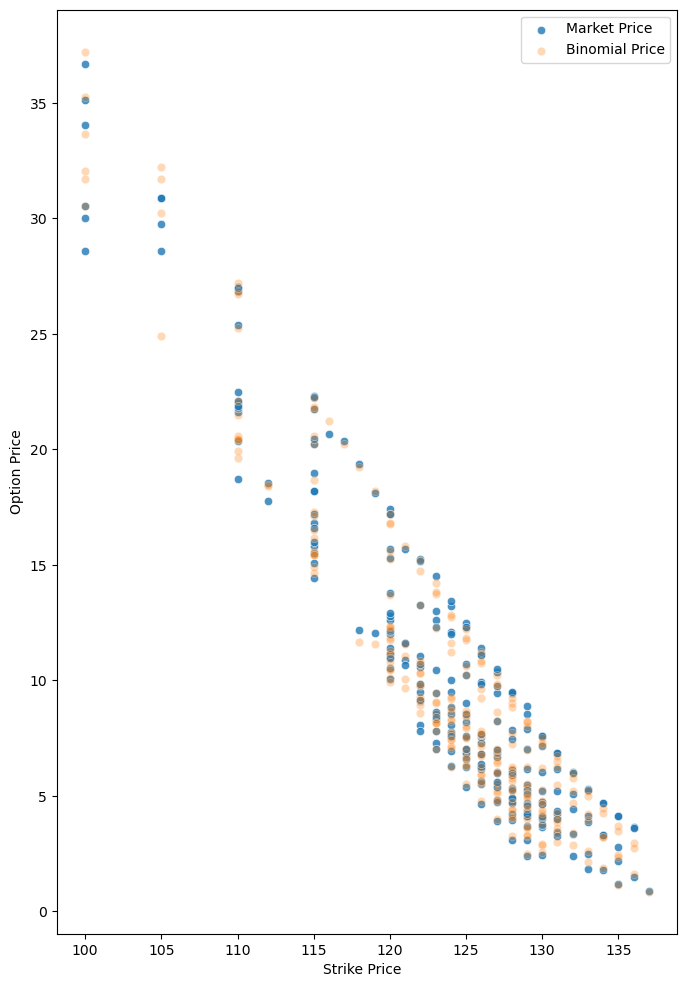

In [50]:
# Ploting Option Price vs Strike Price

plt.figure(figsize=(8,12),dpi=100)

plt.ylabel('Option Price')

sns.scatterplot(x='Strike Price  ', y='Close  ', data=df_inmoney, label='Market Price', alpha=0.8)
sns.scatterplot(x='Strike Price  ', y='Binomial Price', data=df_inmoney, label='Binomial Price', alpha=0.3)

<Axes: xlabel='Strike Price  ', ylabel='Option Price'>

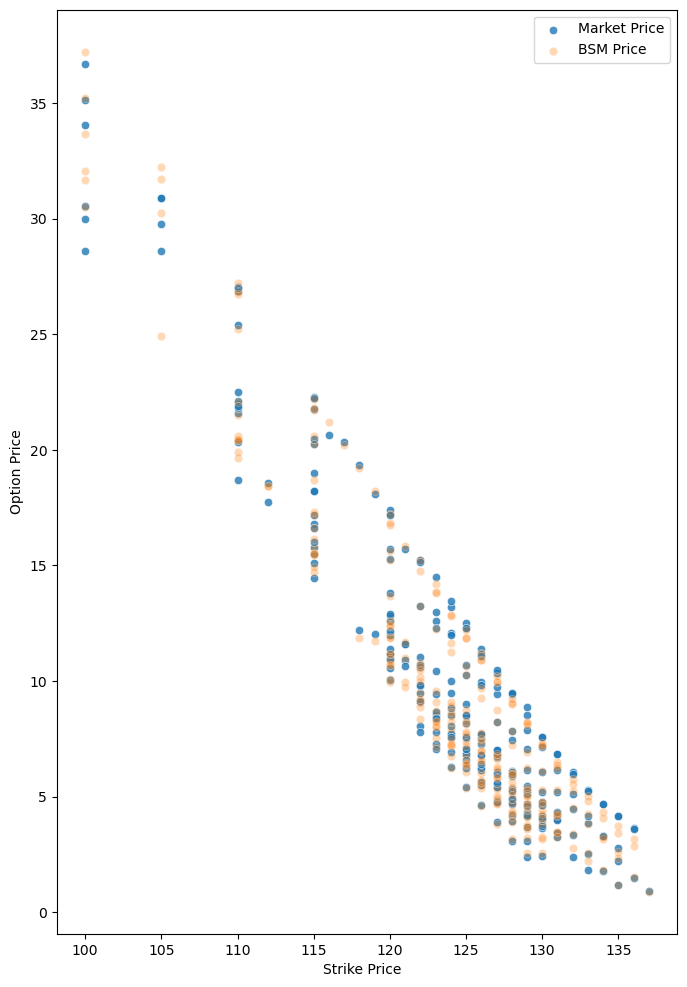

In [51]:
# Ploting Option Price vs Strike Price

plt.figure(figsize=(8,12),dpi=100)

plt.ylabel('Option Price')

sns.scatterplot(x='Strike Price  ', y='Close  ', data=df_inmoney, label='Market Price', alpha=0.8)
sns.scatterplot(x='Strike Price  ', y='BSM Price', data=df_inmoney, label='BSM Price', alpha=0.3)


<Axes: xlabel='Strike Price  ', ylabel='Option Price'>

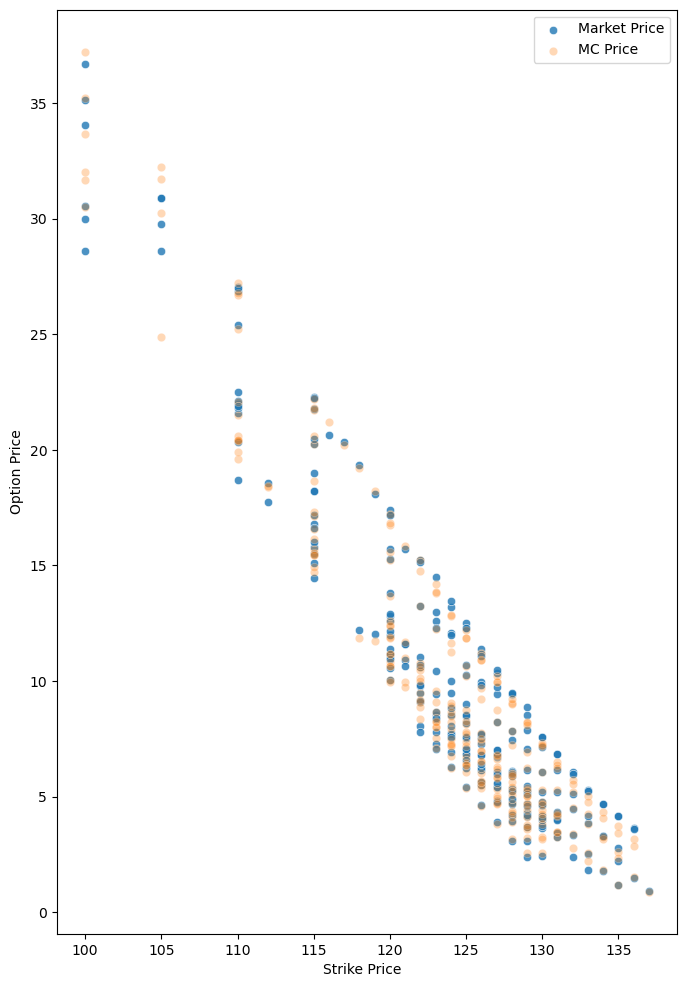

In [52]:
# Ploting Option Price vs Strike Price

plt.figure(figsize=(8,12),dpi=100)

plt.ylabel('Option Price')

sns.scatterplot(x='Strike Price  ', y='Close  ', data=df_inmoney, label='Market Price', alpha=0.8)
sns.scatterplot(x='Strike Price  ', y='MC Price', data=df_inmoney, label='MC Price', alpha=0.3)

<Axes: xlabel='Date  ', ylabel='Option Price'>

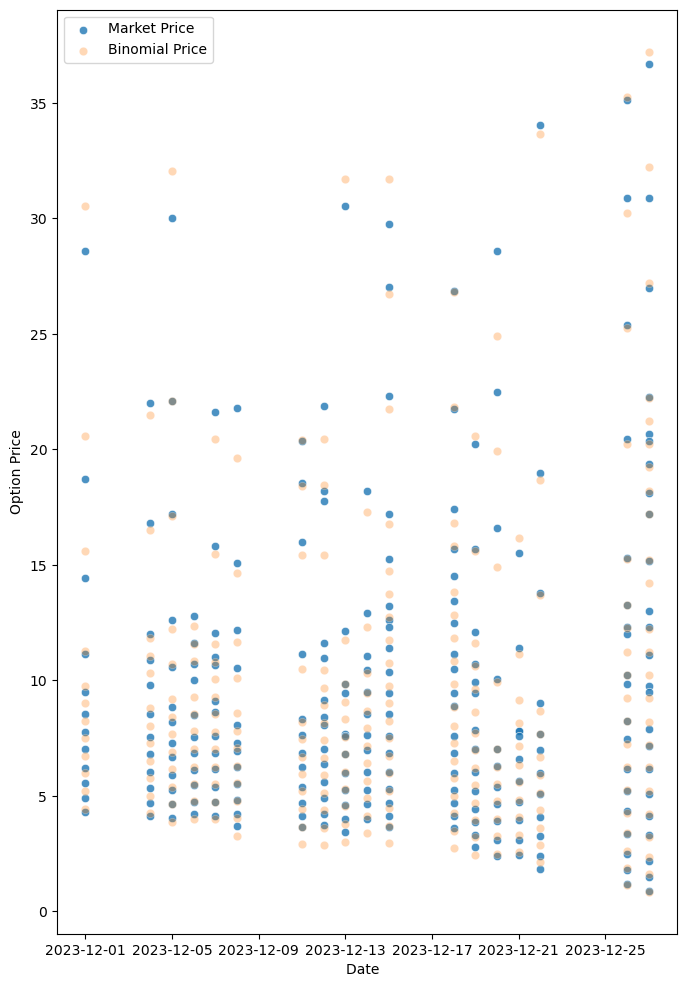

In [53]:
# Plotting Option Price vs Date 

plt.figure(figsize=(8,12),dpi=100)
plt.ylabel('Option Price')


sns.scatterplot(x='Date  ', y='Close  ', data=df_inmoney, label='Market Price',alpha=0.8)
sns.scatterplot(x='Date  ', y='Binomial Price', data=df_inmoney, label='Binomial Price',alpha=0.3)

<Axes: xlabel='Date  ', ylabel='Option Price'>

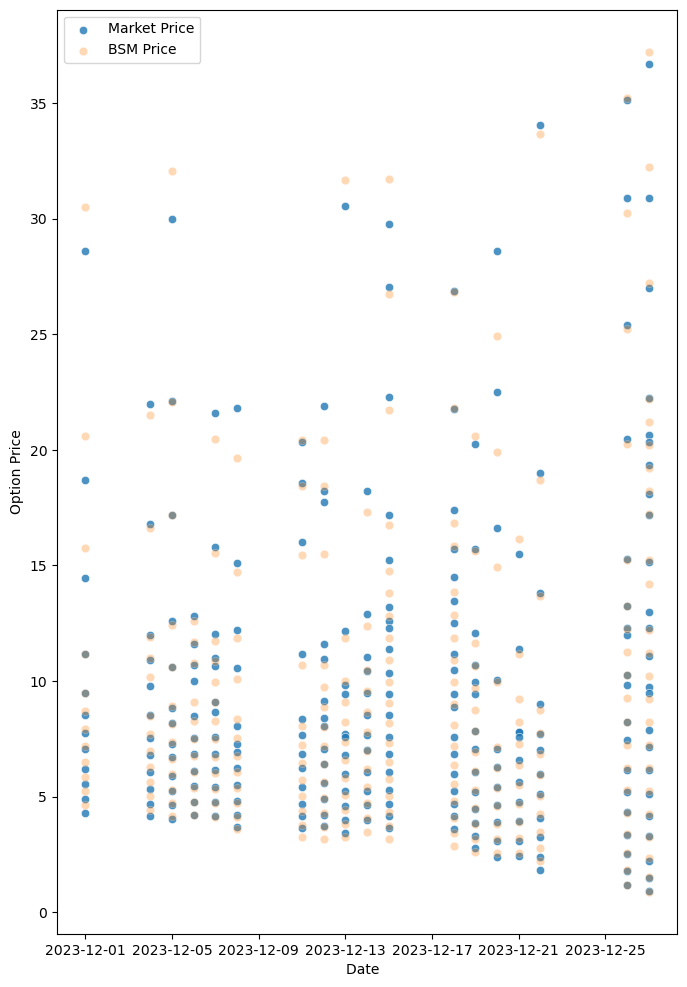

In [54]:
# Plotting Option Price vs Date 

plt.figure(figsize=(8,12),dpi=100)
plt.ylabel('Option Price')


sns.scatterplot(x='Date  ', y='Close  ', data=df_inmoney, label='Market Price',alpha=0.8)
sns.scatterplot(x='Date  ', y='BSM Price', data=df_inmoney, label='BSM Price',alpha=0.3)


<Axes: xlabel='Date  ', ylabel='Option Price'>

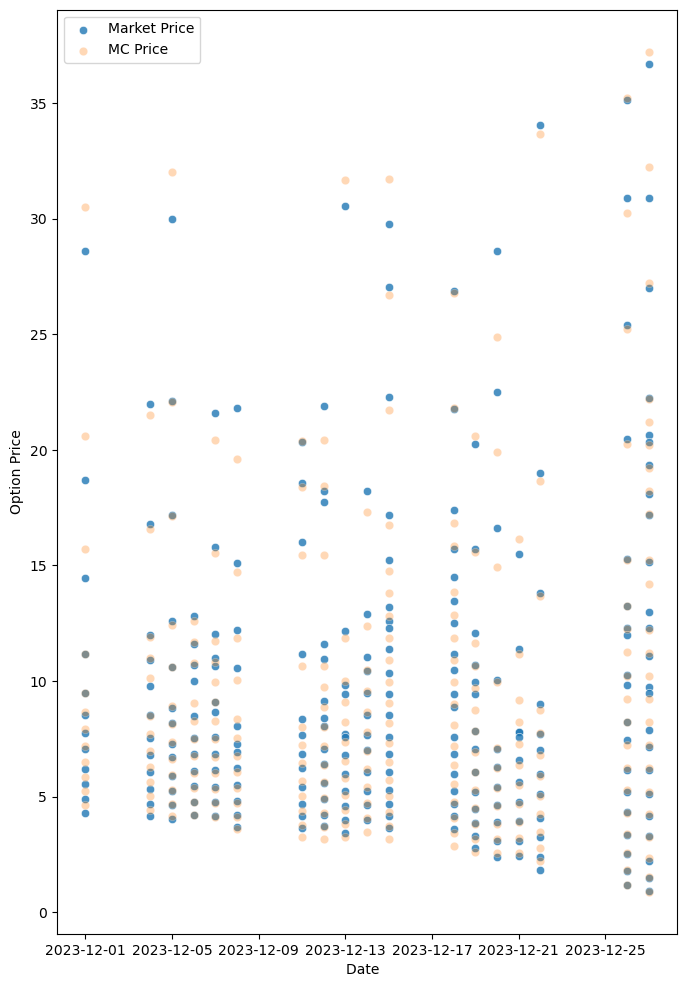

In [55]:
# Plotting Option Price vs Date 

plt.figure(figsize=(8,12),dpi=100)

plt.ylabel('Option Price')


sns.scatterplot(x='Date  ', y='Close  ', data=df_inmoney, label='Market Price',alpha=0.8)
sns.scatterplot(x='Date  ', y='MC Price', data=df_inmoney, label='MC Price',alpha=0.3)

<Axes: xlabel='Closing Price', ylabel='Residuals (Market-Binomial)'>

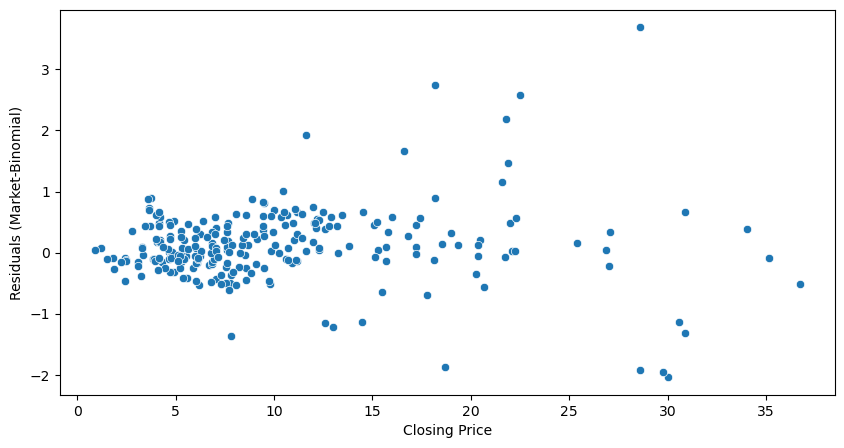

In [56]:
# Plotting Residuals

plt.figure(figsize=(10,5),dpi=100)

plt.xlabel('Closing Price')

plt.ylabel('Residuals (Market-Binomial)')
sns.scatterplot(x=df_inmoney['Close  '], y=df_inmoney['Close  ']-df_inmoney['Binomial Price'])

<Axes: xlabel='Closing Price', ylabel='Residuals (Market-BSM)'>

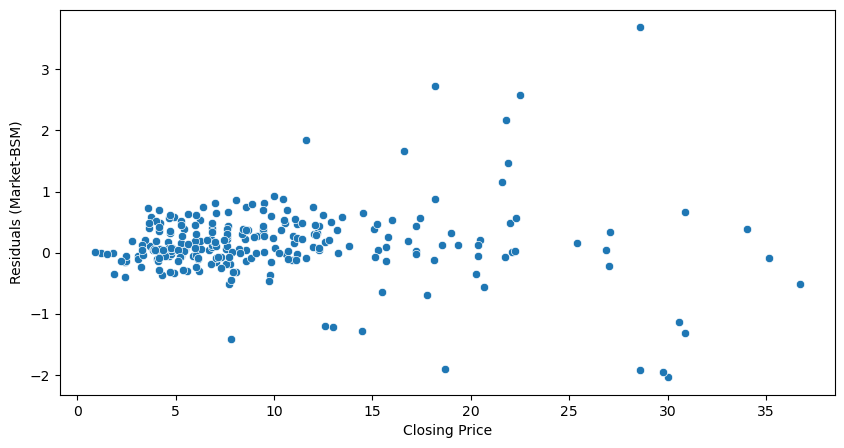

In [57]:
plt.figure(figsize=(10,5),dpi=100)

plt.xlabel('Closing Price')

plt.ylabel('Residuals (Market-BSM)')
sns.scatterplot(x=df_inmoney['Close  '], y=df_inmoney['Close  ']-df_inmoney['BSM Price'])

<Axes: xlabel='Closing Price', ylabel='Residuals (Market-MC)'>

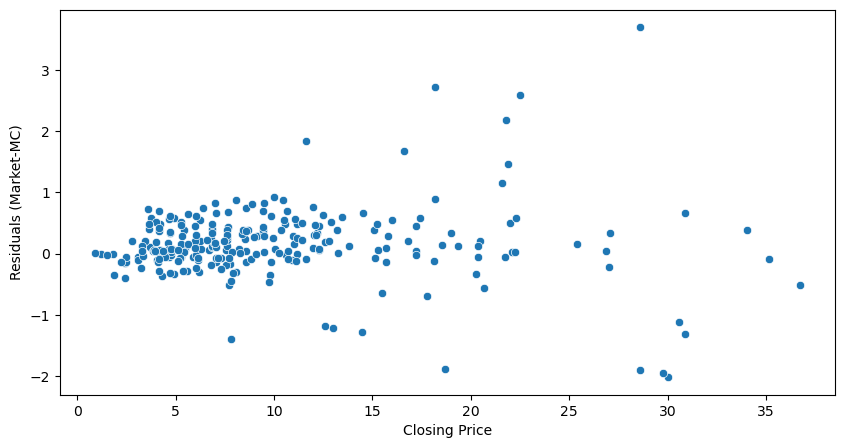

In [58]:
plt.figure(figsize=(10,5),dpi=100)

plt.xlabel('Closing Price')

plt.ylabel('Residuals (Market-MC)')
sns.scatterplot(x=df_inmoney['Close  '], y=df_inmoney['Close  ']-df_inmoney['MC Price'])

In [59]:
df_inmoney_binomial_mae = mean_absolute_error(df_inmoney['Close  '],df_inmoney['Binomial Price'])

In [60]:
df_inmoney_binomial_mse = mean_squared_error(df_inmoney['Close  '],df_inmoney['Binomial Price'])

In [61]:
df_inmoney_binomial_rmse = np.sqrt(mean_squared_error(df_inmoney['Close  '],df_inmoney['Binomial Price']))

In [62]:
df_inmoney_bsm_mae = mean_absolute_error(df_inmoney['Close  '],df_inmoney['BSM Price'])
df_inmoney_bsm_mse = mean_squared_error(df_inmoney['Close  '],df_inmoney['BSM Price'])
df_inmoney_bsm_rmse = np.sqrt(mean_squared_error(df_inmoney['Close  '],df_inmoney['BSM Price']))

In [63]:
df_inmoney_mc_mae = mean_absolute_error(df_inmoney['Close  '],df_inmoney['MC Price'])
df_inmoney_mc_mse = mean_squared_error(df_inmoney['Close  '],df_inmoney['MC Price'])
df_inmoney_mc_rmse = np.sqrt(mean_squared_error(df_inmoney['Close  '],df_inmoney['MC Price']))

In [64]:
df_inmoney_error = pd.DataFrame({'MAE': [df_inmoney_binomial_mae, df_inmoney_bsm_mae, df_inmoney_mc_mae], 'MSE': [df_inmoney_binomial_mse,df_inmoney_bsm_mse, df_inmoney_mc_mse], 'RMSE': [df_inmoney_binomial_rmse,df_inmoney_bsm_rmse, df_inmoney_mc_rmse]},index=['Binomial','BSM','MC'])
df_inmoney_error                                                                                                                  

,MAE,MSE,RMSE
Binomial,0.404821,0.395410,0.628816
BSM,0.381394,0.381686,0.617808
MC,0.384263,0.383816,0.619528


In [65]:
# Now out of money options.

<Axes: xlabel='Strike Price  ', ylabel='Option Price'>

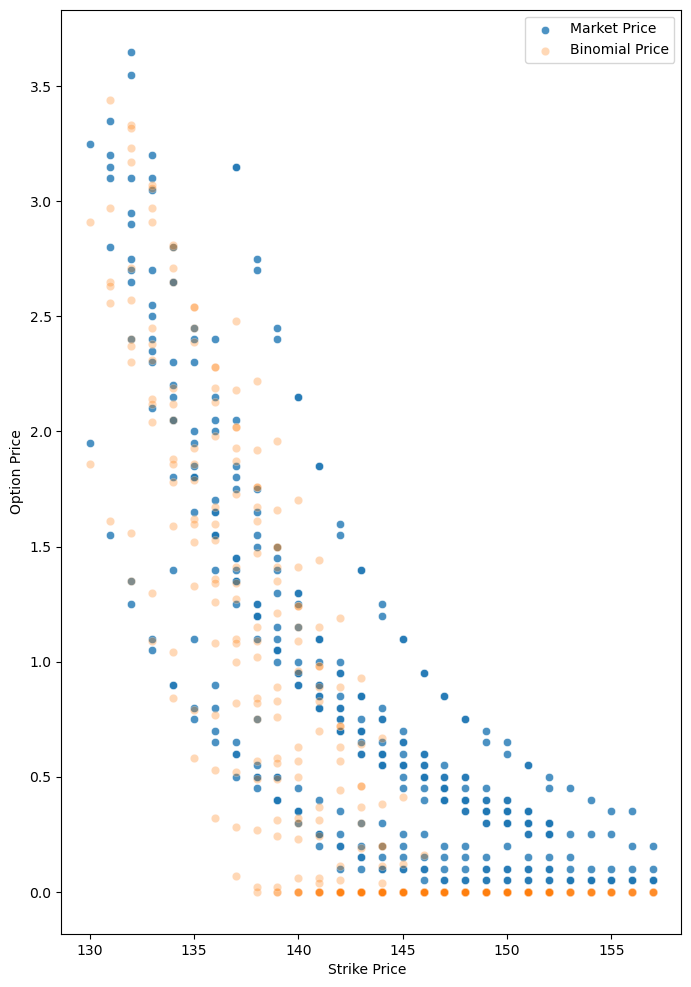

In [66]:
# Ploting Option Price vs Strike Price 

plt.figure(figsize=(8,12),dpi=100)

plt.ylabel('Option Price')

sns.scatterplot(x='Strike Price  ', y='Close  ', data=df_outmoney, label='Market Price', alpha=0.8)
sns.scatterplot(x='Strike Price  ', y='Binomial Price', data=df_outmoney, label='Binomial Price', alpha=0.3)

<Axes: xlabel='Strike Price  ', ylabel='Option Price'>

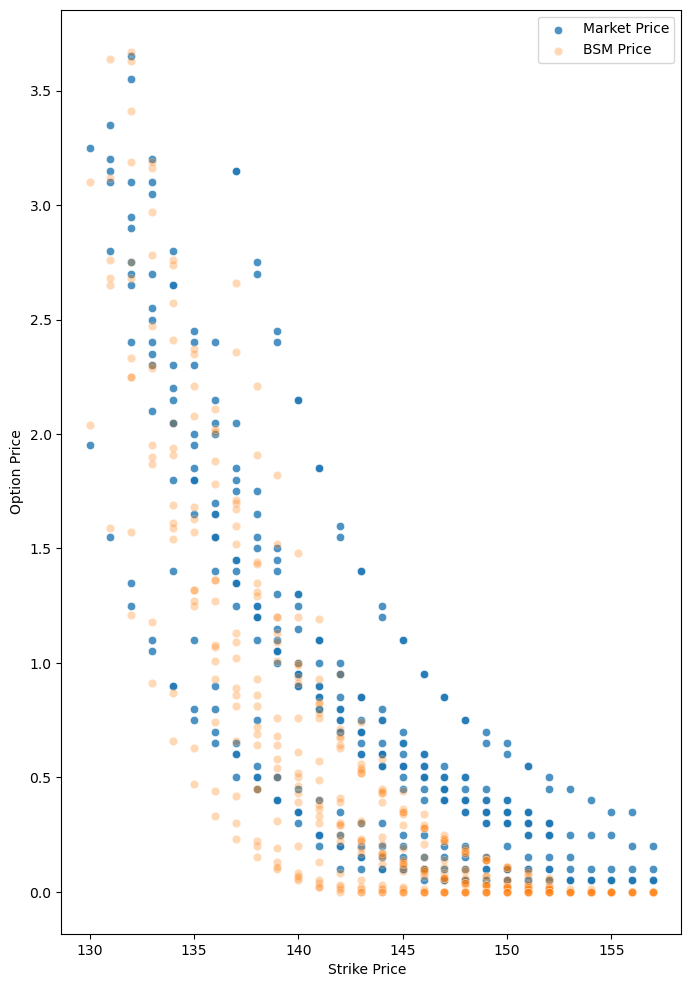

In [67]:
plt.figure(figsize=(8,12),dpi=100)

plt.ylabel('Option Price')

sns.scatterplot(x='Strike Price  ', y='Close  ', data=df_outmoney, label='Market Price', alpha=0.8)
sns.scatterplot(x='Strike Price  ', y='BSM Price', data=df_outmoney, label='BSM Price', alpha=0.3)

<Axes: xlabel='Strike Price  ', ylabel='Option Price'>

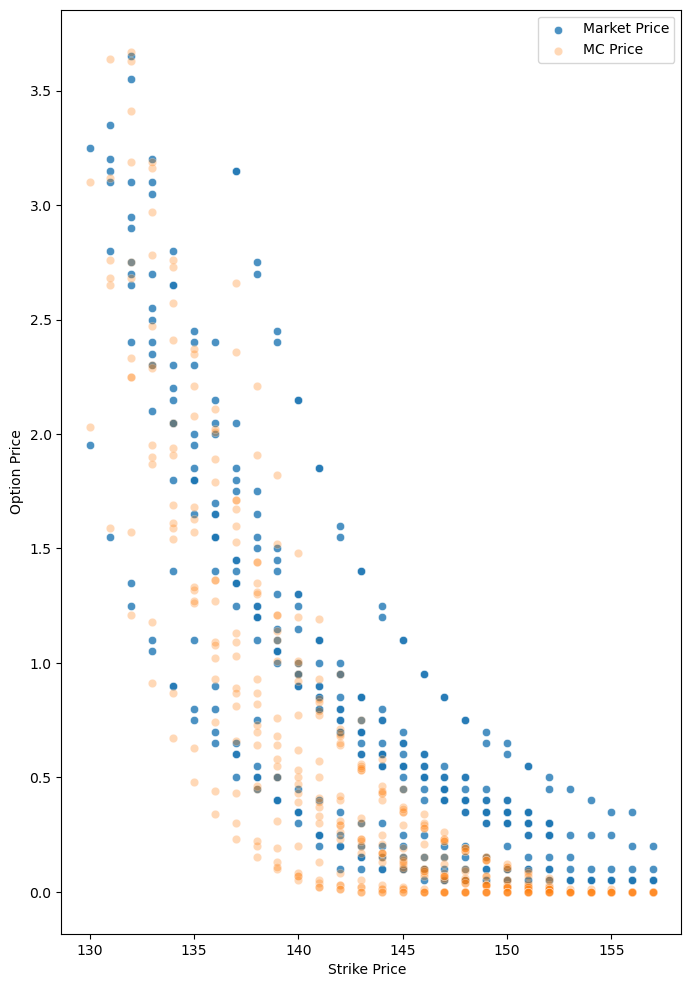

In [68]:
plt.figure(figsize=(8,12),dpi=100)

plt.ylabel('Option Price')

sns.scatterplot(x='Strike Price  ', y='Close  ', data=df_outmoney, label='Market Price', alpha=0.8)
sns.scatterplot(x='Strike Price  ', y='MC Price', data=df_outmoney, label='MC Price', alpha=0.3)

<Axes: xlabel='Date  ', ylabel='Option Price'>

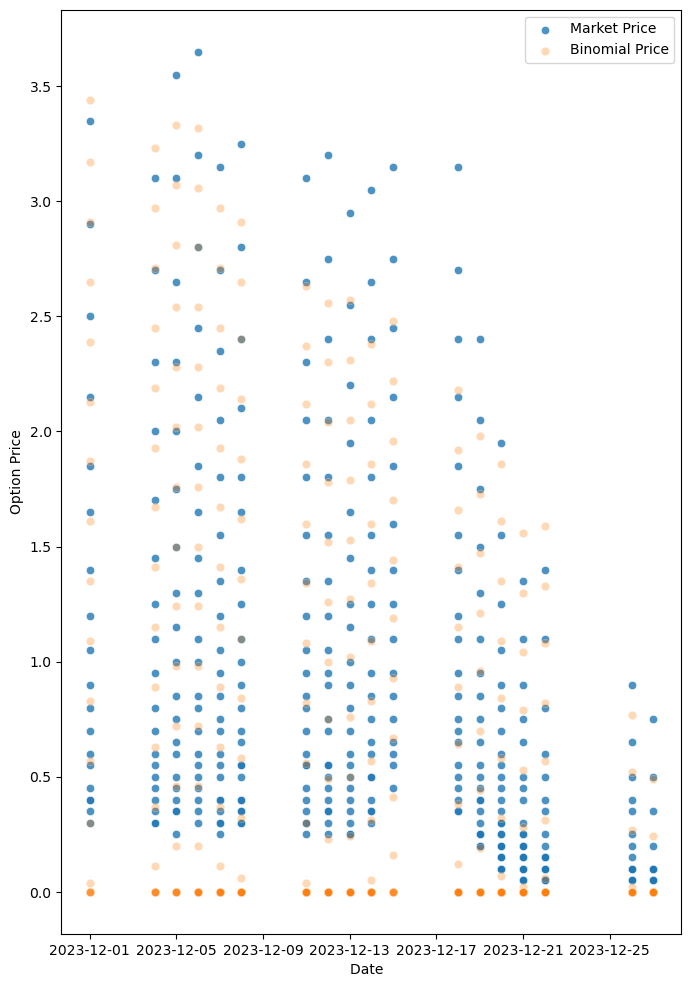

In [69]:
# Plotting Option Price vs Date

plt.figure(figsize=(8,12),dpi=100)

plt.ylabel('Option Price')


sns.scatterplot(x='Date  ', y='Close  ', data=df_outmoney, label='Market Price', alpha=0.8)
sns.scatterplot(x='Date  ', y='Binomial Price', data=df_outmoney, label='Binomial Price', alpha=0.3)

<Axes: xlabel='Date  ', ylabel='Option Price'>

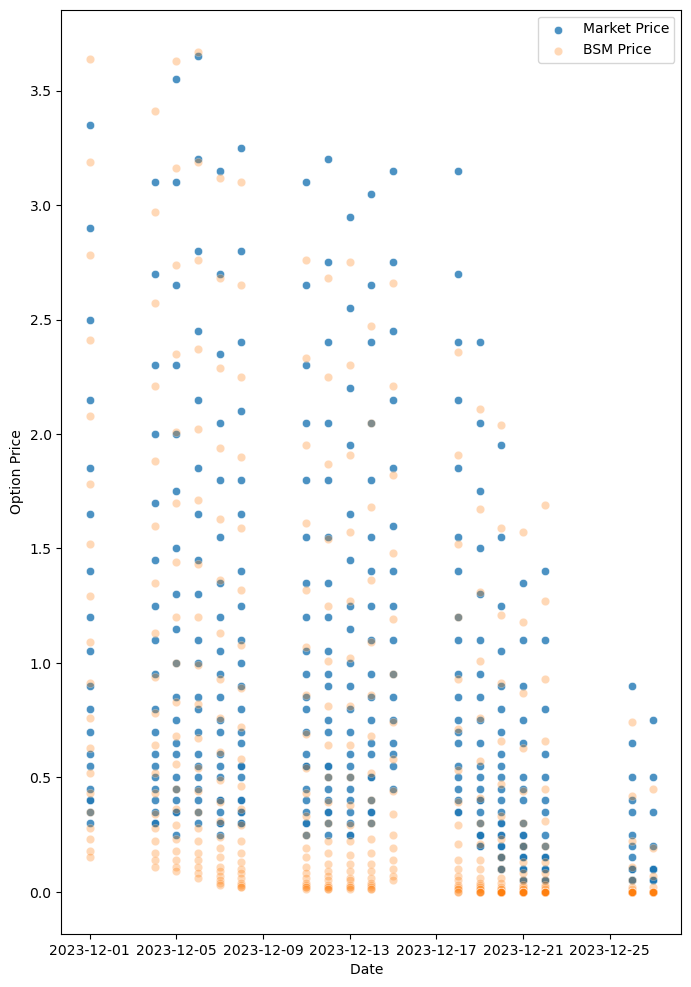

In [70]:
# Plotting Option Price vs Date

plt.figure(figsize=(8,12),dpi=100)

plt.ylabel('Option Price')


sns.scatterplot(x='Date  ', y='Close  ', data=df_outmoney, label='Market Price', alpha=0.8)
sns.scatterplot(x='Date  ', y='BSM Price', data=df_outmoney, label='BSM Price', alpha=0.3)

<Axes: xlabel='Date  ', ylabel='Option Price'>

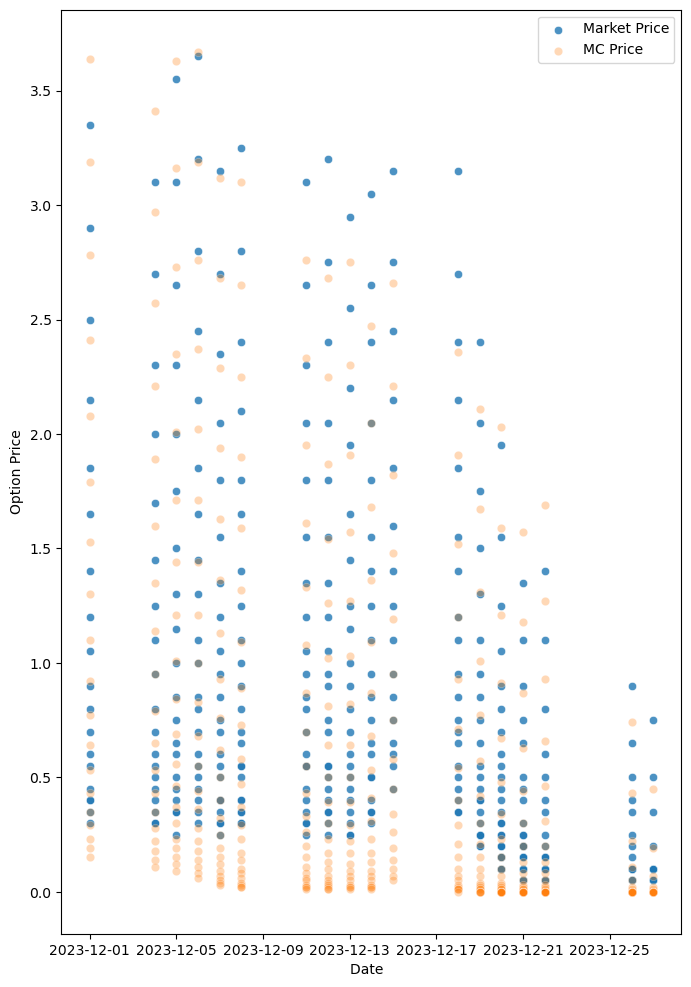

In [71]:
# Plotting Option Price vs Date

plt.figure(figsize=(8,12),dpi=100)

plt.ylabel('Option Price')


sns.scatterplot(x='Date  ', y='Close  ', data=df_outmoney, label='Market Price', alpha=0.8)
sns.scatterplot(x='Date  ', y='MC Price', data=df_outmoney, label='MC Price', alpha=0.3)

<Axes: xlabel='Closing Price', ylabel='Residuals (Market-Binomial)'>

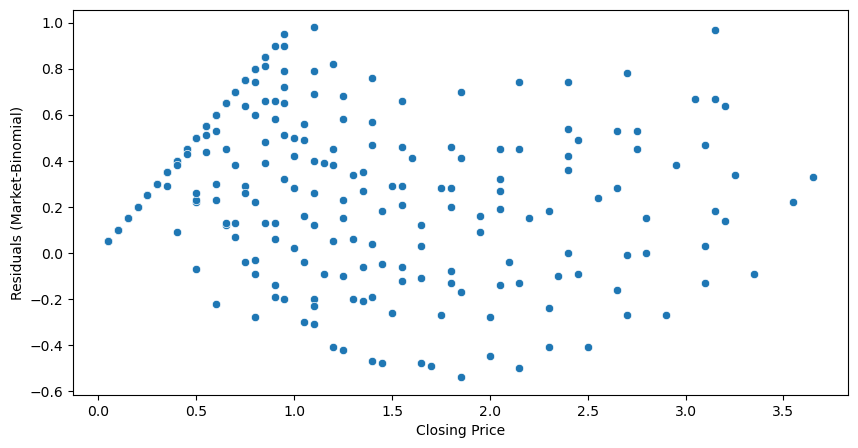

In [72]:
# Plotting Residuals

plt.figure(figsize=(10,5),dpi=100)

plt.xlabel('Closing Price')

plt.ylabel('Residuals (Market-Binomial)')
sns.scatterplot(x=df_outmoney['Close  '], y=df_outmoney['Close  ']-df_outmoney['Binomial Price'])

<Axes: xlabel='Closing Price', ylabel='Residuals (Market-BSM)'>

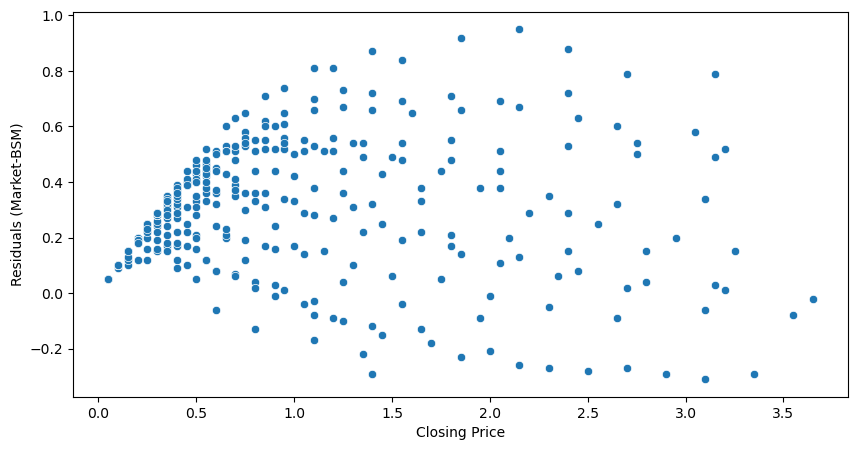

In [73]:
plt.figure(figsize=(10,5),dpi=100)

plt.xlabel('Closing Price')

plt.ylabel('Residuals (Market-BSM)')
sns.scatterplot(x=df_outmoney['Close  '], y=df_outmoney['Close  ']-df_outmoney['BSM Price'])

<Axes: xlabel='Closing Price', ylabel='Residuals (Market-MC)'>

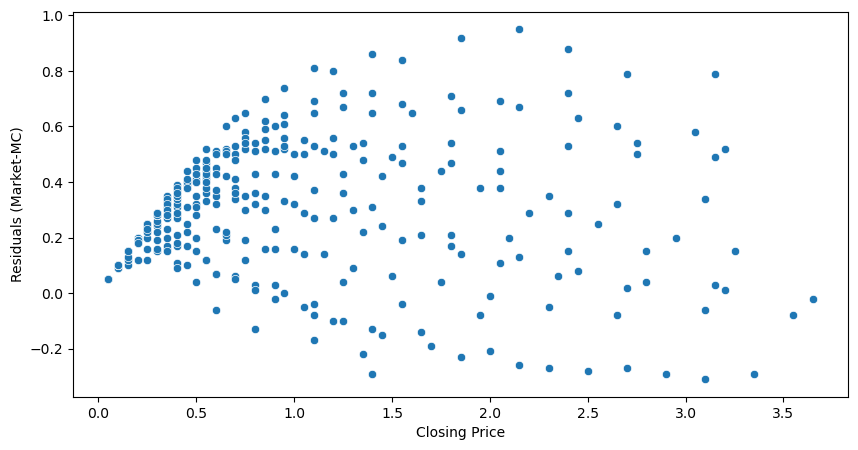

In [74]:
plt.figure(figsize=(10,5),dpi=100)

plt.xlabel('Closing Price')
plt.ylabel('Residuals (Market-MC)')
sns.scatterplot(x=df_outmoney['Close  '], y=df_outmoney['Close  ']-df_outmoney['MC Price'])

In [75]:
df_outmoney_binomial_mae = mean_absolute_error(df_outmoney['Close  '],df_outmoney['Binomial Price'])
df_outmoney_binomial_mse = mean_squared_error(df_outmoney['Close  '],df_outmoney['Binomial Price'])
df_outmoney_binomial_rmse = np.sqrt(mean_squared_error(df_outmoney['Close  '],df_outmoney['Binomial Price']))

In [76]:
df_outmoney_bsm_mae = mean_absolute_error(df_outmoney['Close  '],df_outmoney['BSM Price'])
df_outmoney_bsm_mse = mean_squared_error(df_outmoney['Close  '],df_outmoney['BSM Price'])
df_outmoney_bsm_rmse = np.sqrt(mean_squared_error(df_outmoney['Close  '],df_outmoney['BSM Price']))

In [77]:
df_outmoney_mc_mae = mean_absolute_error(df_outmoney['Close  '],df_outmoney['MC Price'])
df_outmoney_mc_mse = mean_squared_error(df_outmoney['Close  '],df_outmoney['MC Price'])
df_outmoney_mc_rmse = np.sqrt(mean_squared_error(df_outmoney['Close  '],df_outmoney['MC Price']))

In [78]:
df_outmoney_error = pd.DataFrame({'MAE': [df_outmoney_binomial_mae, df_outmoney_bsm_mae, df_outmoney_mc_mae], 'MSE': [df_outmoney_binomial_mse,df_outmoney_bsm_mse, df_outmoney_mc_mse], 'RMSE': [df_outmoney_binomial_rmse,df_outmoney_bsm_rmse, df_outmoney_mc_rmse]},index=['Binomial','BSM','MC'])
df_outmoney_error

,MAE,MSE,RMSE
Binomial,0.333990,0.160984,0.401229
BSM,0.294456,0.126944,0.356292
MC,0.292228,0.125282,0.353953


In [79]:
# Now at the money options

In [80]:
df_atmoney

,Symbol,Date,Expiry,Option type,Strike Price,Close,LTP,Settle Price,No. of contracts,Underlying Value,Maturity Time,Binomial Price,BSM Price,MC Price
0,TATASTEEL,2023-12-01,2023-12-28,CE,130,3.80,3.70,3.80,5787.0,130.0,0.073973,3.70,4.13,4.13
1,TATASTEEL,2023-12-04,2023-12-28,CE,131,3.60,3.60,3.60,1137.0,131.0,0.065753,3.49,3.90,3.90
2,TATASTEEL,2023-12-07,2023-12-28,CE,130,3.65,3.65,3.65,2324.0,130.0,0.057534,3.23,3.61,3.60
3,TATASTEEL,2023-12-14,2023-12-28,CE,132,3.45,3.45,3.45,4263.0,132.0,0.038356,2.63,2.95,2.95
4,TATASTEEL,2023-12-21,2023-12-28,CE,131,1.85,1.80,1.85,4632.0,131.0,0.019178,1.81,2.03,2.03


<Axes: xlabel='Date  ', ylabel='Option Price'>

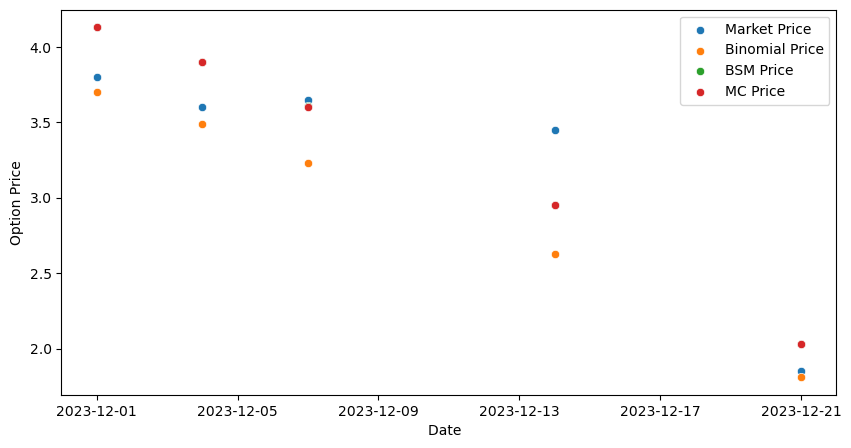

In [81]:
plt.figure(figsize=(10,5),dpi=100)

plt.ylabel('Option Price')


sns.scatterplot(x='Date  ', y='Close  ', data=df_atmoney, label='Market Price')
sns.scatterplot(x='Date  ', y='Binomial Price', data=df_atmoney, label='Binomial Price')
sns.scatterplot(x='Date  ', y='BSM Price', data=df_atmoney, label='BSM Price')
sns.scatterplot(x='Date  ', y='MC Price', data=df_atmoney, label='MC Price')

In [82]:
# Calculating implied volatility

Initially, I tried Newton-Raphson method to calculate implied volatility.

'''def implied_volatility_call(market_price, S, K, T, r):
    def error_function(sigma, market_price, S, K, T, r):
        return blackScholes(r, S, K, T, sigma) - market_price
    implied_volatility = newton(error_function, x0=0.01, args=(market_price, S, K, T, r),tol=1e-12)
    return implied_volatility'''
    
This method fails to converge under given tolerance and initial estimate.

In its place, Brent’s method has been used.

In [83]:
from scipy.optimize import brentq

def implied_volatility_call(market_price, S, K, T, r):
    def error_function(sigma, market_price, S, K, T, r):
        return blackScholes(r, S, K, T, sigma) - market_price
    
    # Using Brent's method to find the root (implied volatility)
    implied_volatility = brentq(error_function, -1, 5.0, args=(market_price, S, K, T, r), xtol=1e-6)
    return implied_volatility

In [84]:
df_inmoney['Implied Volatility']=np.vectorize(implied_volatility_call)(df_inmoney['Close  '],df_inmoney['Underlying Value  '],df_inmoney['Strike Price  '],df_inmoney['Maturity Time'],risk_free)

In [85]:
df_inmoney

,Symbol,Date,Expiry,Option type,Strike Price,Close,LTP,Settle Price,No. of contracts,Underlying Value,Maturity Time,Binomial Price,BSM Price,MC Price,Implied Volatility
0,TATASTEEL,2023-12-01,2023-12-28,CE,100,28.60,28.60,30.50,1.0,130.0,0.073973,30.52,30.52,30.50,7.573641e-07
1,TATASTEEL,2023-12-01,2023-12-28,CE,110,18.70,18.70,20.60,3.0,130.0,0.073973,20.57,20.60,20.58,3.073054e-07
2,TATASTEEL,2023-12-01,2023-12-28,CE,115,14.45,14.45,15.75,25.0,130.0,0.073973,15.59,15.74,15.73,4.455813e-08
3,TATASTEEL,2023-12-01,2023-12-28,CE,120,11.15,11.10,11.15,141.0,130.0,0.073973,11.28,11.17,11.16,2.659965e-01
4,TATASTEEL,2023-12-01,2023-12-28,CE,122,9.50,9.50,9.50,15.0,130.0,0.073973,9.76,9.49,9.48,2.704366e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,TATASTEEL,2023-12-27,2023-12-28,CE,133,4.15,4.10,4.15,352.0,137.2,0.002740,4.23,4.23,4.23,6.446226e-07
247,TATASTEEL,2023-12-27,2023-12-28,CE,134,3.30,3.20,3.30,377.0,137.2,0.002740,3.23,3.26,3.26,3.144352e-01
248,TATASTEEL,2023-12-27,2023-12-28,CE,135,2.20,2.10,2.20,3468.0,137.2,0.002740,2.35,2.34,2.34,3.054950e-07
249,TATASTEEL,2023-12-27,2023-12-28,CE,136,1.50,1.35,1.50,3043.0,137.2,0.002740,1.60,1.53,1.53,2.556297e-01


In [86]:
def option_valuation (implied_volatility):
    if implied_volatility-hist_vol>0:
        return "Overvalued"
    elif implied_volatility-hist_vol<0:
        return "Undervalued"
    else:
        return "Par"

In [87]:
df_inmoney['Valuation'] = df_inmoney['Implied Volatility'].apply(option_valuation)

In [88]:
df_inmoney

,Symbol,Date,Expiry,Option type,Strike Price,Close,LTP,Settle Price,No. of contracts,Underlying Value,Maturity Time,Binomial Price,BSM Price,MC Price,Implied Volatility,Valuation
0,TATASTEEL,2023-12-01,2023-12-28,CE,100,28.60,28.60,30.50,1.0,130.0,0.073973,30.52,30.52,30.50,7.573641e-07,Undervalued
1,TATASTEEL,2023-12-01,2023-12-28,CE,110,18.70,18.70,20.60,3.0,130.0,0.073973,20.57,20.60,20.58,3.073054e-07,Undervalued
2,TATASTEEL,2023-12-01,2023-12-28,CE,115,14.45,14.45,15.75,25.0,130.0,0.073973,15.59,15.74,15.73,4.455813e-08,Undervalued
3,TATASTEEL,2023-12-01,2023-12-28,CE,120,11.15,11.10,11.15,141.0,130.0,0.073973,11.28,11.17,11.16,2.659965e-01,Undervalued
4,TATASTEEL,2023-12-01,2023-12-28,CE,122,9.50,9.50,9.50,15.0,130.0,0.073973,9.76,9.49,9.48,2.704366e-01,Overvalued
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,TATASTEEL,2023-12-27,2023-12-28,CE,133,4.15,4.10,4.15,352.0,137.2,0.002740,4.23,4.23,4.23,6.446226e-07,Undervalued
247,TATASTEEL,2023-12-27,2023-12-28,CE,134,3.30,3.20,3.30,377.0,137.2,0.002740,3.23,3.26,3.26,3.144352e-01,Overvalued
248,TATASTEEL,2023-12-27,2023-12-28,CE,135,2.20,2.10,2.20,3468.0,137.2,0.002740,2.35,2.34,2.34,3.054950e-07,Undervalued
249,TATASTEEL,2023-12-27,2023-12-28,CE,136,1.50,1.35,1.50,3043.0,137.2,0.002740,1.60,1.53,1.53,2.556297e-01,Undervalued


In [89]:
df_outmoney['Implied Volatility']=np.vectorize(implied_volatility_call)(df_outmoney['Close  '],df_outmoney['Underlying Value  '],df_outmoney['Strike Price  '],df_outmoney['Maturity Time'],risk_free)

df_outmoney['Valuation'] = df_outmoney['Implied Volatility'].apply(option_valuation)

df_outmoney

,Symbol,Date,Expiry,Option type,Strike Price,Close,LTP,Settle Price,No. of contracts,Underlying Value,Maturity Time,Binomial Price,BSM Price,MC Price,Implied Volatility,Valuation
0,TATASTEEL,2023-12-01,2023-12-28,CE,131,3.35,3.20,3.35,1294.0,130.0,0.073973,3.44,3.64,3.64,0.248356,Undervalued
1,TATASTEEL,2023-12-01,2023-12-28,CE,132,2.90,2.75,2.90,2046.0,130.0,0.073973,3.17,3.19,3.19,0.248373,Undervalued
2,TATASTEEL,2023-12-01,2023-12-28,CE,133,2.50,2.40,2.50,1359.0,130.0,0.073973,2.91,2.78,2.78,0.248454,Undervalued
3,TATASTEEL,2023-12-01,2023-12-28,CE,134,2.15,2.10,2.15,756.0,130.0,0.073973,2.65,2.41,2.41,0.249388,Undervalued
4,TATASTEEL,2023-12-01,2023-12-28,CE,135,1.85,1.75,1.85,7612.0,130.0,0.073973,2.39,2.08,2.08,0.251125,Undervalued
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,TATASTEEL,2023-12-27,2023-12-28,CE,152,0.05,0.05,0.05,18.0,137.2,0.002740,0.00,0.00,0.00,0.947815,Overvalued
382,TATASTEEL,2023-12-27,2023-12-28,CE,153,0.05,0.05,0.05,11.0,137.2,0.002740,0.00,0.00,0.00,1.001601,Overvalued
383,TATASTEEL,2023-12-27,2023-12-28,CE,154,0.05,0.05,0.05,3.0,137.2,0.002740,0.00,0.00,0.00,1.033946,Overvalued
384,TATASTEEL,2023-12-27,2023-12-28,CE,155,0.05,0.05,0.05,5.0,137.2,0.002740,0.00,0.00,0.00,1.091728,Overvalued


In [90]:
df_atmoney['Implied Volatility']=np.vectorize(implied_volatility_call)(df_atmoney['Close  '],df_atmoney['Underlying Value  '],df_atmoney['Strike Price  '],df_atmoney['Maturity Time'],risk_free)

df_atmoney['Valuation'] = df_atmoney['Implied Volatility'].apply(option_valuation)

df_atmoney

,Symbol,Date,Expiry,Option type,Strike Price,Close,LTP,Settle Price,No. of contracts,Underlying Value,Maturity Time,Binomial Price,BSM Price,MC Price,Implied Volatility,Valuation
0,TATASTEEL,2023-12-01,2023-12-28,CE,130,3.80,3.70,3.80,5787.0,130.0,0.073973,3.70,4.13,4.13,0.245539,Undervalued
1,TATASTEEL,2023-12-04,2023-12-28,CE,131,3.60,3.60,3.60,1137.0,131.0,0.065753,3.49,3.90,3.90,0.246117,Undervalued
2,TATASTEEL,2023-12-07,2023-12-28,CE,130,3.65,3.65,3.65,2324.0,130.0,0.057534,3.23,3.61,3.60,0.272554,Overvalued
3,TATASTEEL,2023-12-14,2023-12-28,CE,132,3.45,3.45,3.45,4263.0,132.0,0.038356,2.63,2.95,2.95,0.317775,Overvalued
4,TATASTEEL,2023-12-21,2023-12-28,CE,131,1.85,1.80,1.85,4632.0,131.0,0.019178,1.81,2.03,2.03,0.243083,Undervalued


In [91]:
df_inmoney.to_excel('ITM_Call.xlsx')

In [92]:
df_outmoney.to_excel('OTM_Call.xlsx')

In [93]:
df_atmoney.to_excel('ATM_Call.xlsx')

In [94]:
# Volatility Smile

In [95]:
df_inmoney_subset = df_inmoney[df_inmoney['No. of contracts  ']>100].drop(labels=['Symbol  ', 'Expiry  ', 'Option type  ','Close  ', 'LTP  ', 'Settle Price  ', 'No. of contracts  ', 'Binomial Price', 'BSM Price','MC Price', 'Valuation'],axis=1)
df_outmoney_subset =  df_outmoney[df_outmoney['No. of contracts  ']>100].drop(labels=['Symbol  ', 'Expiry  ', 'Option type  ','Close  ', 'LTP  ', 'Settle Price  ', 'No. of contracts  ', 'Binomial Price', 'BSM Price','MC Price', 'Valuation'],axis=1)
df_atmoney_subset =  df_atmoney[df_atmoney['No. of contracts  ']>100].drop(labels=['Symbol  ', 'Expiry  ', 'Option type  ','Close  ', 'LTP  ', 'Settle Price  ', 'No. of contracts  ', 'Binomial Price', 'BSM Price','MC Price', 'Valuation'],axis=1)

df_inmoney_subset['Implied Volatility'] = round(df_inmoney_subset['Implied Volatility'],4)
df_outmoney_subset['Implied Volatility'] = round(df_outmoney_subset['Implied Volatility'],4)
df_atmoney_subset['Implied Volatility'] = round(df_atmoney_subset['Implied Volatility'],4)

df_call_combined = pd.concat([df_inmoney_subset,df_atmoney_subset,df_outmoney_subset],axis=0,ignore_index=True)

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

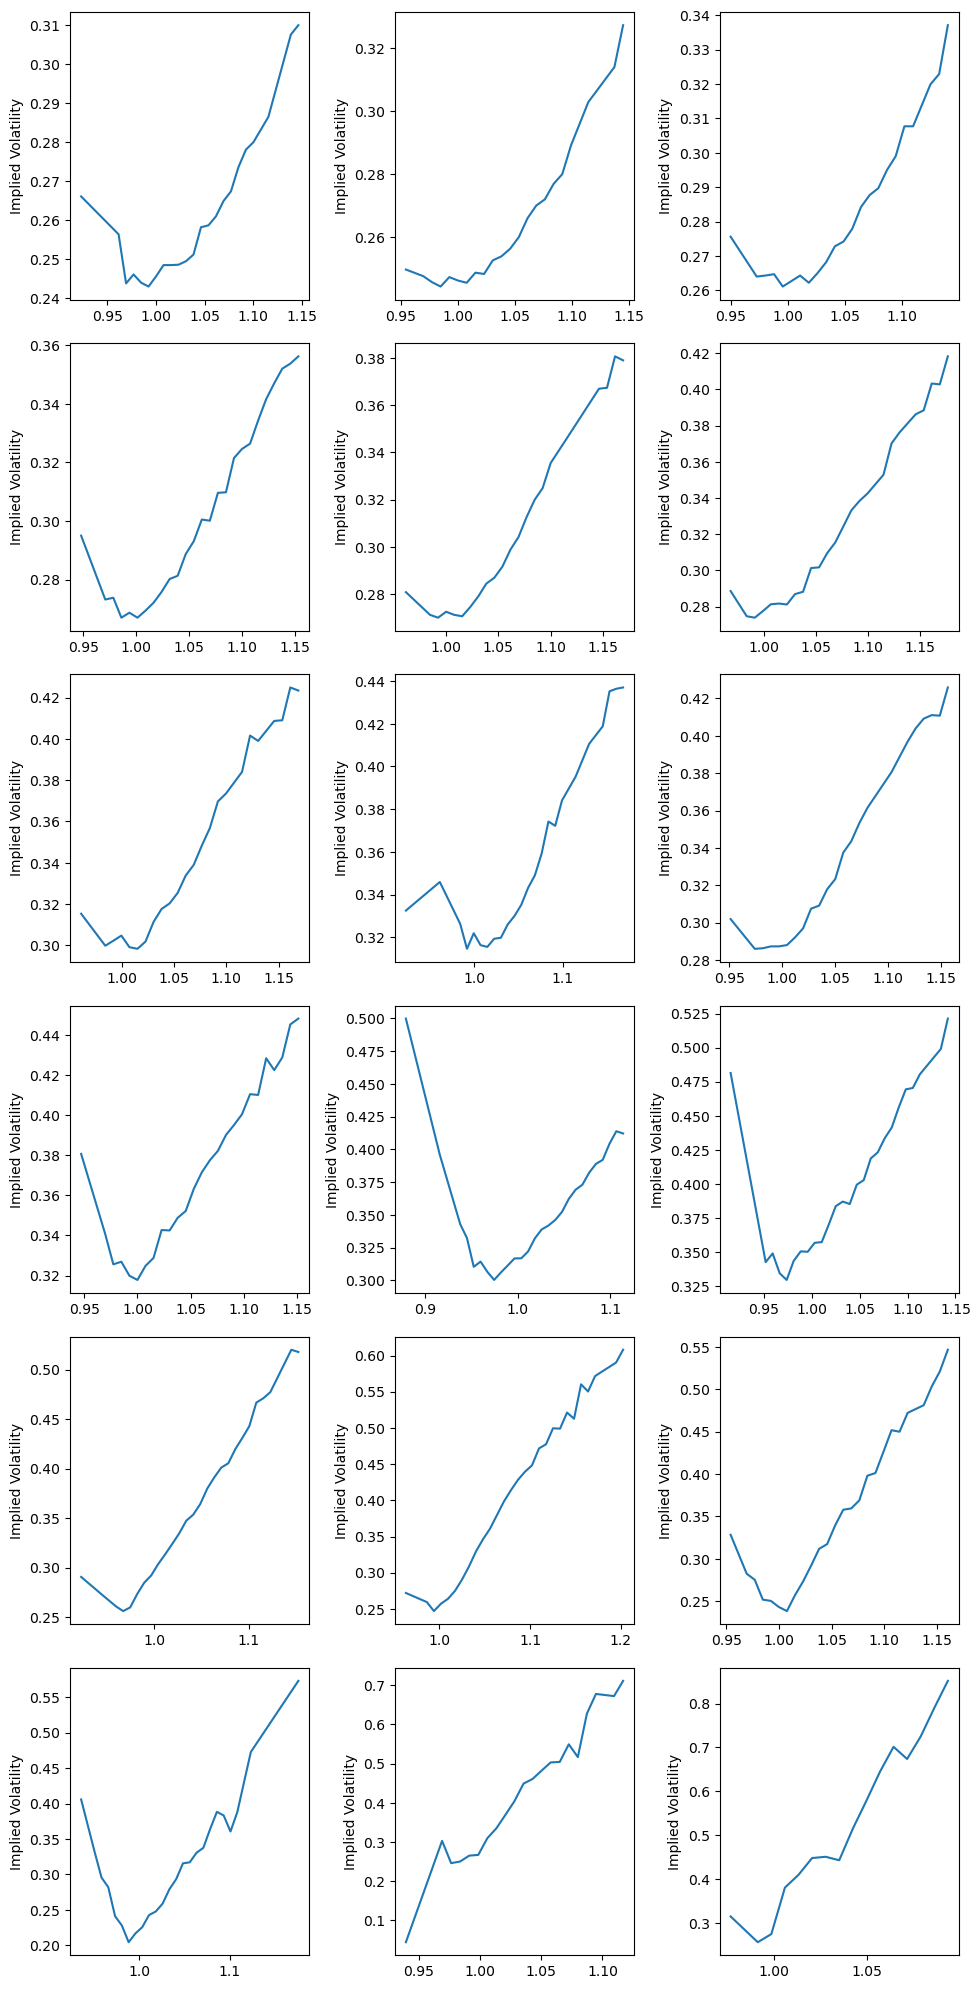

In [96]:
fig,axes = plt.subplots(nrows=6,ncols=3,figsize=(10,20))
y_ticks = [0.1 * i for i in range(11)]

a1 = df_call_combined[(df_call_combined['Implied Volatility']>0) & (df_call_combined['Date  '] == '2023-12-1')]
a2 = df_call_combined[(df_call_combined['Implied Volatility']>0) & (df_call_combined['Date  '] == '2023-12-4')]
a3 = df_call_combined[(df_call_combined['Implied Volatility']>0) & (df_call_combined['Date  '] == '2023-12-5')]
a4 = df_call_combined[(df_call_combined['Implied Volatility']>0) & (df_call_combined['Date  '] == '2023-12-6')]
a5 = df_call_combined[(df_call_combined['Implied Volatility']>0) & (df_call_combined['Date  '] == '2023-12-7')]
a6 = df_call_combined[(df_call_combined['Implied Volatility']>0) & (df_call_combined['Date  '] == '2023-12-8')]
a7 = df_call_combined[(df_call_combined['Implied Volatility']>0) & (df_call_combined['Date  '] == '2023-12-11')]
a8 = df_call_combined[(df_call_combined['Implied Volatility']>0) & (df_call_combined['Date  '] == '2023-12-12')]
a9 = df_call_combined[(df_call_combined['Implied Volatility']>0) & (df_call_combined['Date  '] == '2023-12-13')]
a10 = df_call_combined[(df_call_combined['Implied Volatility']>0) & (df_call_combined['Date  '] == '2023-12-14')]
a11 = df_call_combined[(df_call_combined['Implied Volatility']>0) & (df_call_combined['Date  '] == '2023-12-15')]
a12 = df_call_combined[(df_call_combined['Implied Volatility']>0) & (df_call_combined['Date  '] == '2023-12-18')]
a13 = df_call_combined[(df_call_combined['Implied Volatility']>0) & (df_call_combined['Date  '] == '2023-12-19')]
a14 = df_call_combined[(df_call_combined['Implied Volatility']>0) & (df_call_combined['Date  '] == '2023-12-20')]
a15 = df_call_combined[(df_call_combined['Implied Volatility']>0) & (df_call_combined['Date  '] == '2023-12-21')]
a16 = df_call_combined[(df_call_combined['Implied Volatility']>0) & (df_call_combined['Date  '] == '2023-12-22')]
a17 = df_call_combined[(df_call_combined['Implied Volatility']>0) & (df_call_combined['Date  '] == '2023-12-26')]
a18 = df_call_combined[(df_call_combined['Implied Volatility']>0) & (df_call_combined['Date  '] == '2023-12-27')]

sns.lineplot(ax=axes[0,0],x=a1['Strike Price  ']/a1['Underlying Value  '],y=a1['Implied Volatility'])
sns.lineplot(ax=axes[0,1],x=a2['Strike Price  ']/a2['Underlying Value  '],y=a2['Implied Volatility'])
sns.lineplot(ax=axes[0,2],x=a3['Strike Price  ']/a3['Underlying Value  '],y=a3['Implied Volatility'])
sns.lineplot(ax=axes[1,0],x=a4['Strike Price  ']/a4['Underlying Value  '],y=a4['Implied Volatility'])
sns.lineplot(ax=axes[1,1],x=a5['Strike Price  ']/a5['Underlying Value  '],y=a5['Implied Volatility'])
sns.lineplot(ax=axes[1,2],x=a6['Strike Price  ']/a6['Underlying Value  '],y=a6['Implied Volatility'])
sns.lineplot(ax=axes[2,0],x=a7['Strike Price  ']/a7['Underlying Value  '],y=a7['Implied Volatility'])
sns.lineplot(ax=axes[2,1],x=a8['Strike Price  ']/a8['Underlying Value  '],y=a8['Implied Volatility'])
sns.lineplot(ax=axes[2,2],x=a9['Strike Price  ']/a9['Underlying Value  '],y=a9['Implied Volatility'])
sns.lineplot(ax=axes[3,0],x=a10['Strike Price  ']/a10['Underlying Value  '],y=a10['Implied Volatility'])
sns.lineplot(ax=axes[3,1],x=a11['Strike Price  ']/a11['Underlying Value  '],y=a11['Implied Volatility'])
sns.lineplot(ax=axes[3,2],x=a12['Strike Price  ']/a12['Underlying Value  '],y=a12['Implied Volatility'])
sns.lineplot(ax=axes[4,0],x=a13['Strike Price  ']/a13['Underlying Value  '],y=a13['Implied Volatility'])
sns.lineplot(ax=axes[4,1],x=a14['Strike Price  ']/a14['Underlying Value  '],y=a14['Implied Volatility'])
sns.lineplot(ax=axes[4,2],x=a15['Strike Price  ']/a15['Underlying Value  '],y=a15['Implied Volatility'])
sns.lineplot(ax=axes[5,0],x=a16['Strike Price  ']/a16['Underlying Value  '],y=a16['Implied Volatility'])
sns.lineplot(ax=axes[5,1],x=a17['Strike Price  ']/a17['Underlying Value  '],y=a17['Implied Volatility'])
sns.lineplot(ax=axes[5,2],x=a18['Strike Price  ']/a18['Underlying Value  '],y=a18['Implied Volatility'])



plt.tight_layout()

In [97]:
# The above cell can be rewritten using a for loop

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

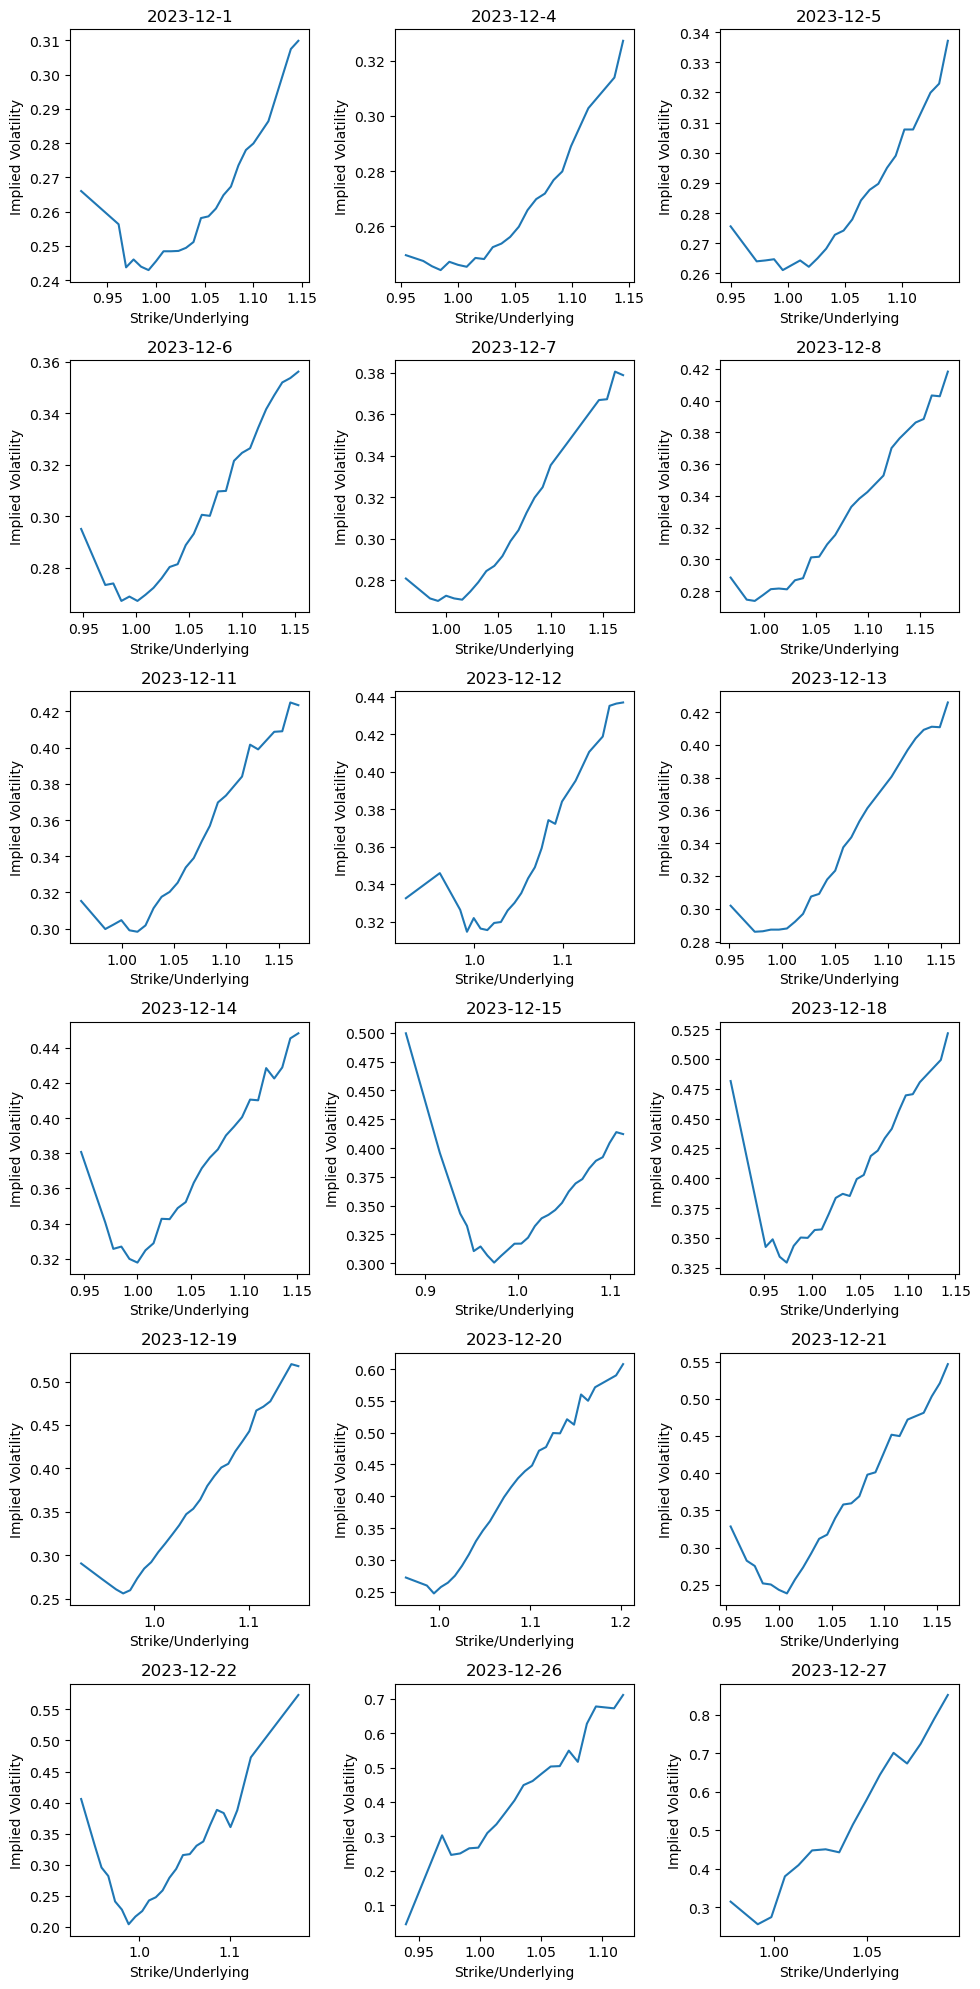

In [98]:
date = ['2023-12-1','2023-12-4','2023-12-5','2023-12-6','2023-12-7','2023-12-8','2023-12-11','2023-12-12','2023-12-13','2023-12-14','2023-12-15','2023-12-18','2023-12-19','2023-12-20','2023-12-21','2023-12-22','2023-12-26','2023-12-27']

fig,axes = plt.subplots(nrows=6,ncols=3,figsize=(10,20))

i=0
for ax in axes.flat:
    placeholder = df_call_combined[(df_call_combined['Implied Volatility']>0) & (df_call_combined['Date  '] == date[i])] 
    sns.lineplot(ax=ax,x=placeholder['Strike Price  ']/placeholder['Underlying Value  '],y=placeholder['Implied Volatility'])
    ax.set_xlabel('Strike/Underlying')
    ax.set_title(f'{date[i]}')
    i=i+1

plt.tight_layout()